# Influence Analysis
This notebook contains code to predict centrality measures using solely node information

## Pull Data

In [32]:
import networkx as nx
import pandas as pd

edge_list_df = pd.read_csv('./datasets/hedden_network_full_data.csv') #Read into a df
G = nx.from_pandas_edgelist(edge_list_df, 'source', 'target')
G_directed = G.to_directed()

/Users/mjraj01/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
edge_list_df

,Unnamed: 0,Unnamed: 0.1,source,target,source_follower_count,source_verified,name,screen_name,location,profile_location,...,geo_enabled,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_use_background_image,has_extended_profile,default_profile,default_profile_image
0,0,0,1210627806,1.565499e+18,444.0,False,Steve Hedden,SteveHedden,"Denver, CO",NaN,...,True,1053.0,NaN,False,False,False,False,NaN,NaN,NaN
1,1,1,1210627806,1.180134e+18,444.0,False,Steve Hedden,SteveHedden,"Denver, CO",NaN,...,True,1053.0,NaN,False,False,False,False,False,False,False
2,2,2,1210627806,1.449127e+18,444.0,False,Steve Hedden,SteveHedden,"Denver, CO",NaN,...,True,1053.0,NaN,False,False,False,False,False,False,False
3,3,3,1210627806,2.316443e+09,444.0,False,Steve Hedden,SteveHedden,"Denver, CO",NaN,...,True,1053.0,NaN,False,False,False,False,False,False,False
4,4,4,1210627806,1.379983e+18,444.0,False,Steve Hedden,SteveHedden,"Denver, CO",NaN,...,True,1053.0,NaN,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860720,860720,4995,45436858,1.441975e+18,200716.0,True,Congaree Natl Park,CongareeNPS,"South Carolina, USA",NaN,...,True,15445.0,NaN,False,False,False,True,True,False,False
860721,860721,4996,45436858,1.441947e+18,200716.0,True,Congaree Natl Park,CongareeNPS,"South Carolina, USA",NaN,...,True,15445.0,NaN,False,False,False,True,True,False,False
860722,860722,4997,45436858,1.411345e+18,200716.0,True,Congaree Natl Park,CongareeNPS,"South Carolina, USA",NaN,...,True,15445.0,NaN,False,False,False,True,True,False,False
860723,860723,4998,45436858,1.441931e+18,200716.0,True,Congaree Natl Park,CongareeNPS,"South Carolina, USA",NaN,...,True,15445.0,NaN,False,False,False,True,True,False,False


In [42]:
G_directed = nx.from_pandas_edgelist(edge_list_df, 
                                     source = 'target', 
                                     target ='source', 
                                     create_using=nx.DiGraph()
                                    )

G_directed.is_directed()

True

In [44]:
G_directed.in_degree(1210627806)

445

## Add Centrality

In [46]:
degree_centrality_dict = nx.degree_centrality(G_directed)
print(degree_centrality_dict[1210627806])

eigenvector_centrality_dict = nx.eigenvector_centrality(G_directed)
print(eigenvector_centrality_dict[1210627806])


0.0007540346937038103
0.44467558748396996


KeyboardInterrupt: 

In [315]:
#this takes foreverrrrrr
closeness_centrality_dict = nx.closeness_centrality(G_directed)
print(closeness_centrality_dict[1210627806])

0.49535996208629546


In [99]:
sources_df = edge_list_df.drop('target', axis = 1)
sources_df=sources_df.loc[:, ~sources_df.columns.str.match('Unnamed')]

sources_df

,source,source_follower_count,source_verified,name,screen_name,location,profile_location,protected,friends_count,listed_count,...,geo_enabled,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_use_background_image,has_extended_profile,default_profile,default_profile_image
0,1210627806,444.0,False,Steve Hedden,SteveHedden,"Denver, CO",NaN,False,1985.0,35.0,...,True,1053.0,NaN,False,False,False,False,NaN,NaN,NaN
1,1210627806,444.0,False,Steve Hedden,SteveHedden,"Denver, CO",NaN,False,1985.0,35.0,...,True,1053.0,NaN,False,False,False,False,False,False,False
2,1210627806,444.0,False,Steve Hedden,SteveHedden,"Denver, CO",NaN,False,1985.0,35.0,...,True,1053.0,NaN,False,False,False,False,False,False,False
3,1210627806,444.0,False,Steve Hedden,SteveHedden,"Denver, CO",NaN,False,1985.0,35.0,...,True,1053.0,NaN,False,False,False,False,False,False,False
4,1210627806,444.0,False,Steve Hedden,SteveHedden,"Denver, CO",NaN,False,1985.0,35.0,...,True,1053.0,NaN,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860720,45436858,200716.0,True,Congaree Natl Park,CongareeNPS,"South Carolina, USA",NaN,False,214388.0,2710.0,...,True,15445.0,NaN,False,False,False,True,True,False,False
860721,45436858,200716.0,True,Congaree Natl Park,CongareeNPS,"South Carolina, USA",NaN,False,214388.0,2710.0,...,True,15445.0,NaN,False,False,False,True,True,False,False
860722,45436858,200716.0,True,Congaree Natl Park,CongareeNPS,"South Carolina, USA",NaN,False,214388.0,2710.0,...,True,15445.0,NaN,False,False,False,True,True,False,False
860723,45436858,200716.0,True,Congaree Natl Park,CongareeNPS,"South Carolina, USA",NaN,False,214388.0,2710.0,...,True,15445.0,NaN,False,False,False,True,True,False,False


In [317]:
for i, row in sources_df.iterrows():
    user_id = row['source']
    sources_df.at[i,'degree_centrality'] = degree_centrality_dict[user_id]
    sources_df.at[i,'eigenvector_centrality'] = eigenvector_centrality_dict[user_id]
    sources_df.at[i,'closeness_centrality'] = closeness_centrality_dict[user_id]
    print(i)

/Users/mjraj01/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/mjraj01/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0
1
445
459
518
1200
1212
1313
1344
1357
6357
6927
6995
7059
7215
7807
8027
8177
13177
13337
14076
14377
19377
24064
26692
28554
28562
28597
30963
32177
32840
33769
38769
39096
40032
40480
45480
45821
46713
48126
49479
50542
50824
52412
57412
59969
61613
62828
64223
64285
64317
69317
69353
70215
70309
71711
72503
73255
73436
78436
78450
78453
78552
78570
79976
80811
81239
81260
86260
86428
86440
86674
86745
87048
87401
87770
87924
92142
95202
100202
105202
105253
105365
105721
105978
110978
111278
112399
112483
117483
118015
122808
123195
123349
123930
124755
126129
131129
131148
135723
140723
145552
148082
153082
154070
154228
154656
154681
156392
161392
161451
166451
167429
167526
167750
167945
168316
168320
169252
172697
172964
177964
178102
178110
178277
178448
178690
178990
178995
179678
184678
185354
185384
190384
191213
191231
196231
196816
201816
204493
205225
206448
208287
208299
209325
209440
210110
210639
215639
215737
215757
216049
217077
222077
227077
232077
232204
232248


## Predict Centrality

### Clean Data

In [318]:
sources_df = sources_df.drop_duplicates()
sources_df

,source,source_follower_count,source_verified,name,screen_name,location,profile_location,protected,friends_count,listed_count,...,contributors_enabled,is_translator,is_translation_enabled,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,degree_centrality,eigenvector_centrality,closeness_centrality
0,1210627806,444.0,False,Steve Hedden,SteveHedden,"Denver, CO",NaN,False,1985.0,35.0,...,False,False,False,False,NaN,NaN,NaN,0.000754,4.446756e-01,0.495360
1,1210627806,444.0,False,Steve Hedden,SteveHedden,"Denver, CO",NaN,False,1985.0,35.0,...,False,False,False,False,False,False,False,0.000754,4.446756e-01,0.495360
445,1565499318596952065,14.0,False,Carmen Adderiy,CarmenmdAdderiy,"Eugene, OR",NaN,False,0.0,0.0,...,False,False,False,True,False,True,False,0.000019,3.680352e-11,0.000019
459,1180133955187695616,58.0,False,Niko Brutyan⚡️,brut_nik,Lisbon,NaN,False,227.0,0.0,...,False,False,False,True,False,True,False,0.000081,1.539056e-10,0.000080
518,1449127446222188549,685.0,False,PLENEO BTC,PleneoB,NaN,NaN,False,5001.0,0.0,...,False,False,False,True,True,True,False,0.000922,1.775119e-09,0.000922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844135,775410684,7844.0,False,Human Security News,HumanSecurity_,Worldwide,NaN,False,16021.0,68.0,...,False,False,False,False,False,False,False,0.006762,1.457471e-03,0.253205
849135,326352942,1582.0,False,Pardee Center for IFs,PardeeCenterIFs,"Denver, CO",NaN,False,1148.0,50.0,...,False,False,False,False,False,False,False,0.002196,2.496275e-01,0.339795
850718,1158863569,7.0,False,Krista Green,kg987654321,NaN,NaN,False,110.0,0.0,...,False,False,False,True,False,True,True,0.000011,1.858764e-11,0.000009
850725,76348185,4961109.0,True,US Department of the Interior,Interior,"Washington, DC",NaN,False,122725.0,7638.0,...,False,False,False,True,True,False,False,0.006781,1.301172e-08,0.006757


In [319]:
sources_df.isna().sum()

source                            0
source_follower_count             0
source_verified                   0
name                              0
screen_name                       0
location                         91
profile_location                383
protected                         0
friends_count                     0
listed_count                      0
created_at                        0
favourites_count                  0
geo_enabled                       0
statuses_count                    0
lang                            417
contributors_enabled              0
is_translator                     0
is_translation_enabled            0
profile_use_background_image      0
has_extended_profile              1
default_profile                   1
default_profile_image             1
degree_centrality                 0
eigenvector_centrality            0
closeness_centrality              0
dtype: int64

In [320]:
target_name = "closeness_centrality"
target = sources_df[target_name]
target = target.drop(0)

data = sources_df.drop(columns=[target_name, "eigenvector_centrality", "degree_centrality", "profile_location", "lang", "created_at", "name",
                               "screen_name", "location", "source", "has_extended_profile", "default_profile"
                               , "default_profile_image"])

data = data.drop(0)
data

,source_follower_count,source_verified,protected,friends_count,listed_count,favourites_count,geo_enabled,statuses_count,contributors_enabled,is_translator,is_translation_enabled,profile_use_background_image
1,444.0,False,False,1985.0,35.0,371.0,True,1053.0,False,False,False,False
445,14.0,False,False,0.0,0.0,0.0,False,1.0,False,False,False,True
459,58.0,False,False,227.0,0.0,121.0,True,16.0,False,False,False,True
518,685.0,False,False,5001.0,0.0,8327.0,False,4.0,False,False,False,True
1200,12.0,False,False,302.0,0.0,0.0,False,0.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
844135,7844.0,False,False,16021.0,68.0,0.0,False,2654.0,False,False,False,False
849135,1582.0,False,False,1148.0,50.0,888.0,True,2383.0,False,False,False,False
850718,7.0,False,False,110.0,0.0,0.0,False,1.0,False,False,False,True
850725,4961109.0,True,False,122725.0,7638.0,7250.0,True,25797.0,False,False,False,True


### Create Processing Pipeline

In [321]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [322]:
numerical_columns

['source_follower_count',
 'source_verified',
 'protected',
 'friends_count',
 'listed_count',
 'favourites_count',
 'geo_enabled',
 'statuses_count',
 'contributors_enabled',
 'is_translator',
 'is_translation_enabled',
 'profile_use_background_image']

In [323]:
categorical_columns

[]

In [324]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numerical_preprocessor = StandardScaler()

In [325]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [326]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LinearRegression())
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['source_follower_count',
                                                   'source_verified',
                                                   'protected', 'friends_count',
                                                   'listed_count',
                                                   'favourites_count',
                                                   'geo_enabled',
                                                   'statuses_count',
                                                   'contributors_enabled',
                                                   'is_translator',
                                                   'is_translation_enabled',
                                                   'profile_use_background_image'])])),
                (

### Train, Test, and Cross-validate

In [327]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

In [328]:
_ = model.fit(X = data_train, y = target_train)



In [329]:
data_test.head()

,source_follower_count,source_verified,protected,friends_count,listed_count,favourites_count,geo_enabled,statuses_count,contributors_enabled,is_translator,is_translation_enabled,profile_use_background_image
222077,6071.0,False,False,5526.0,16.0,73.0,False,180.0,False,False,False,False
534734,455990.0,True,False,13174.0,5321.0,9029.0,True,21336.0,False,False,False,True
842405,1730.0,False,False,1330.0,16.0,203.0,True,507.0,False,False,False,True
124755,1371.0,False,False,2140.0,64.0,226.0,False,2712.0,False,False,False,True
86674,74.0,False,False,145.0,0.0,22.0,False,54.0,False,False,False,True


In [330]:
model.predict(data_test)[:5]

array([0.15916033, 0.10758726, 0.20695134, 0.16120972, 0.16129969])

In [331]:
target_test[:5]

222077    0.260632
534734    0.006757
842405    0.002338
124755    0.339590
86674     0.331762
Name: closeness_centrality, dtype: float64

In [332]:
model.score(data_test, target_test)



-0.47971917450418977

In [333]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=5)
cv_results

{'fit_time': array([0.01747179, 0.02027106, 0.01575398, 0.00510216, 0.00490069]),
 'score_time': array([0.00342917, 0.00237393, 0.00191307, 0.00211883, 0.00174522]),
 'test_score': array([-0.12427707,  0.03701606, -0.15625432, -0.01321144, -9.02737245])}

In [334]:
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: -1.857 ± 3.586


## Calculate and Visualize Variable Importance

In [336]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['source_follower_count',
                                                   'source_verified',
                                                   'protected', 'friends_count',
                                                   'listed_count',
                                                   'favourites_count',
                                                   'geo_enabled',
                                                   'statuses_count',
                                                   'contributors_enabled',
                                                   'is_translator',
                                                   'is_translation_enabled',
                                                   'profile_use_background_image'])])),
                (

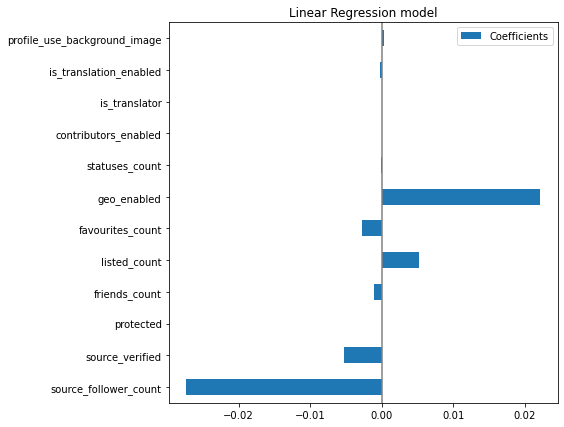

In [337]:
#VARIABLE IMPORTANCE HERE

import matplotlib.pyplot as plt

classifier = model.named_steps['linearregression']

coefs = pd.DataFrame(
   classifier.coef_,
   columns=['Coefficients'], index=data_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Linear Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [182]:
data_train.columns

Index(['source', 'source_follower_count', 'source_verified', 'protected',
       'friends_count', 'listed_count', 'favourites_count', 'geo_enabled',
       'statuses_count', 'contributors_enabled', 'is_translator',
       'is_translation_enabled', 'profile_use_background_image',
       'has_extended_profile', 'default_profile', 'default_profile_image'],
      dtype='object')

In [187]:
print(classifier.coef_)

13


In [188]:
print(classifier.feature_names_in_)

AttributeError: 'LinearRegression' object has no attribute 'feature_names_in_'

In [185]:
listed = classifier.coef_
listed.sort()
print(listed)

[-3.70399362e-03 -1.90565831e-03 -1.16230415e-03 -8.99284333e-04
 -2.44711561e-04 -2.98759824e-05  0.00000000e+00  0.00000000e+00
  8.13151629e-19  3.23621673e-04  3.65845099e-04  4.09522941e-04
  2.58456171e-03]


In [ ]:
httposost://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline_column_transformer.html 

### SGD Regression Model

In [338]:
from sklearn.linear_model import SGDRegressor

est = SGDRegressor(max_iter=1000, tol=1e-3)

model = make_pipeline(preprocessor, est)
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['source_follower_count',
                                                   'source_verified',
                                                   'protected', 'friends_count',
                                                   'listed_count',
                                                   'favourites_count',
                                                   'geo_enabled',
                                                   'statuses_count',
                                                   'contributors_enabled',
                                                   'is_translator',
                                                   'is_translation_enabled',
                                                   'profile_use_background_image'])])),
                (

In [339]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

In [340]:
_ = model.fit(X = data_train, y = target_train)

In [341]:
data_test.head()

,source_follower_count,source_verified,protected,friends_count,listed_count,favourites_count,geo_enabled,statuses_count,contributors_enabled,is_translator,is_translation_enabled,profile_use_background_image
222077,6071.0,False,False,5526.0,16.0,73.0,False,180.0,False,False,False,False
534734,455990.0,True,False,13174.0,5321.0,9029.0,True,21336.0,False,False,False,True
842405,1730.0,False,False,1330.0,16.0,203.0,True,507.0,False,False,False,True
124755,1371.0,False,False,2140.0,64.0,226.0,False,2712.0,False,False,False,True
86674,74.0,False,False,145.0,0.0,22.0,False,54.0,False,False,False,True


In [342]:
model.predict(data_test)[:5]

array([0.15546038, 0.10393293, 0.20254406, 0.15848725, 0.15877728])

In [343]:
target_test[:5]

222077    0.260632
534734    0.006757
842405    0.002338
124755    0.339590
86674     0.331762
Name: closeness_centrality, dtype: float64

In [344]:
model.score(data_test, target_test)



-0.10752282969412663

In [345]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=5)
cv_results

{'fit_time': array([0.02669883, 0.00500107, 0.0104928 , 0.00391102, 0.00372195]),
 'score_time': array([0.00539708, 0.00526905, 0.00169492, 0.00200891, 0.00299597]),
 'test_score': array([-0.09497447,  0.03706477, -0.11208971,  0.04638996, -0.6005225 ])}

In [346]:
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: -0.145 ± 0.237


In [348]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['source_follower_count',
                                                   'source_verified',
                                                   'protected', 'friends_count',
                                                   'listed_count',
                                                   'favourites_count',
                                                   'geo_enabled',
                                                   'statuses_count',
                                                   'contributors_enabled',
                                                   'is_translator',
                                                   'is_translation_enabled',
                                                   'profile_use_background_image'])])),
                (

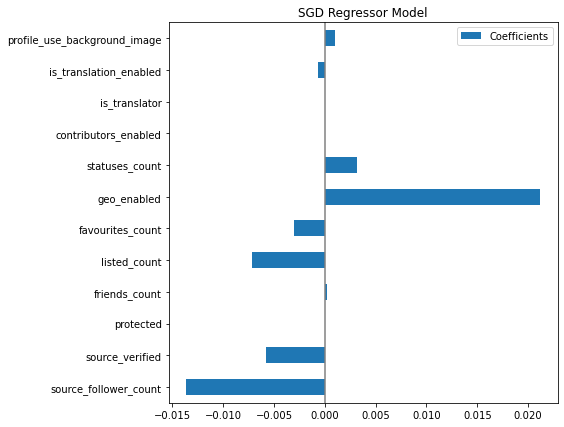

In [349]:
#VARIABLE IMPORTANCE HERE

import matplotlib.pyplot as plt

classifier = model.named_steps['sgdregressor']

coefs = pd.DataFrame(
   classifier.coef_,
   columns=['Coefficients'], index=data_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('SGD Regressor Model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)